In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.decomposition import NMF
from sklearn.datasets import load_digits

In [52]:
def non_negative(data, num_components, iterations=1000, clip=1e-7, cutoff=1e-6):
    rng = np.random.default_rng()

    h = abs(rng.standard_normal(size=(num_components, data.shape[1]))) + clip
    z = abs(rng.standard_normal(size=(data.shape[0], num_components))) + clip
    loss = float("inf")

    for i in range(iterations):
        # Update h
        a = z.T @ data
        a = np.clip(a, clip, None)
        b = (z.T @ z) @ h
        b = np.clip(b, clip, None)
        c = a / b
        h = h * c

        # Update z
        a = data @ h.T
        a = np.clip(a, clip, None)
        b = (z @ h) @ h.T
        b = np.clip(b, clip, None)
        c = a / b
        z = z * c

        loss = np.linalg.norm((data - z @ h) ** 2)
        if loss <= cutoff:
            break

    return h, z, i

Ended after 999 interations.
(10, 64) (1797, 10)


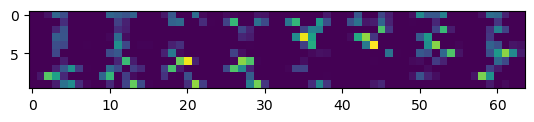

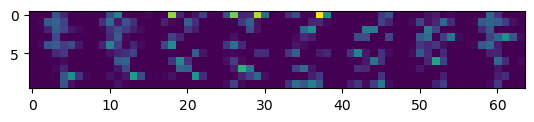

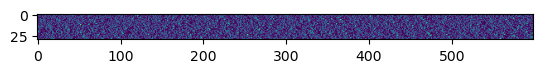

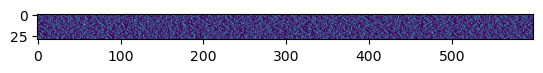

In [55]:
digits = load_digits()
h_own, z_own, i = non_negative(digits["data"], 10, cutoff=1e-1)
print("Ended after", i, "interations.")
print(np.shape(h), np.shape(z))

model = NMF(n_components=10, max_iter=1000, solver="mu")
z_scikit = model.fit_transform(digits["data"])
h_scikit = model.components_

plt.imshow(h_own)
plt.show()
plt.imshow(h_scikit)
plt.show()

plt.imshow(np.reshape(z_own, (30,599)))
plt.show()
plt.imshow(np.reshape(z_scikit, (30,599)))
plt.show()